# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Weather check in each city in cities
units = "imperial"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
count = 1

lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_new = []


print("Beginning data retrieval")
print("--------------------------------")
for city in cities:
        
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_new.append(response['name'])
        
        print(f"Processing record {count}| {city}")
        count += 1
    except:
        print("City not found, skipping to next")
        
print("------------Data retrieval completed----------------")

Beginning data retrieval
--------------------------------
Processing record 1| minna
City not found, skipping to next
Processing record 2| jalu
Processing record 3| rikitea
Processing record 4| acarau
Processing record 5| port elizabeth
Processing record 6| bluff
Processing record 7| hobart
Processing record 8| tres arroyos
Processing record 9| albany
City not found, skipping to next
Processing record 10| makakilo city
Processing record 11| pringsewu
Processing record 12| taltal
Processing record 13| nhulunbuy
Processing record 14| lebu
Processing record 15| ushuaia
Processing record 16| alice springs
Processing record 17| itarema
Processing record 18| punta arenas
Processing record 19| bourges
Processing record 20| dikson
City not found, skipping to next
Processing record 21| smithers
Processing record 22| katobu
Processing record 23| grindavik
Processing record 24| anadyr
Processing record 25| alyangula
Processing record 26| el alto
Processing record 27| tytuvenai
Processing record 2

Processing record 230| bethel
Processing record 231| harindanga
City not found, skipping to next
Processing record 232| vostok
Processing record 233| bonavista
Processing record 234| hithadhoo
Processing record 235| esperance
Processing record 236| jati
Processing record 237| porto nacional
Processing record 238| roald
Processing record 239| broome
City not found, skipping to next
City not found, skipping to next
Processing record 240| glace bay
Processing record 241| luganville
Processing record 242| luanda
Processing record 243| pevek
Processing record 244| vung tau
Processing record 245| chachapoyas
Processing record 246| gunjur
Processing record 247| pisco
Processing record 248| hasaki
Processing record 249| tuktoyaktuk
Processing record 250| kahului
Processing record 251| santa ana
Processing record 252| haimen
Processing record 253| chillan
Processing record 254| puerto del rosario
Processing record 255| ayia paraskevi
City not found, skipping to next
Processing record 256| macus

Processing record 457| tignere
Processing record 458| kungurtug
Processing record 459| lonoy
Processing record 460| paharpur
Processing record 461| sokoni
Processing record 462| dillon
Processing record 463| maragogi
Processing record 464| lompoc
Processing record 465| ubinskoye
Processing record 466| ponnani
Processing record 467| kloulklubed
Processing record 468| goderich
Processing record 469| bubaque
Processing record 470| along
Processing record 471| kushima
Processing record 472| pasighat
Processing record 473| kot addu
Processing record 474| onalaska
Processing record 475| port blair
Processing record 476| ugoofaaru
Processing record 477| harper
Processing record 478| saint-augustin
Processing record 479| svetlogorsk
Processing record 480| abha
Processing record 481| kasongo-lunda
Processing record 482| naze
Processing record 483| dickson
Processing record 484| karasjok
Processing record 485| lusambo
Processing record 486| lichuan
Processing record 487| perth
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
my_dict = {"City":city_new,"Lat":lat,"Lon":lng,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
          "Wind Speed":wind_speed,"Country":country,"Date":date}
city_df = pd.DataFrame(my_dict)
city_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Minna,9.6139,6.5569,79.65,66,100,5.39,NG,1650939128
1,Jalu,29.0331,21.5482,73.49,20,100,9.44,LY,1650939039
2,Rikitea,-23.1203,-134.9692,75.94,74,96,19.35,PF,1650939129
3,Acaraú,-2.8856,-40.1200,77.74,86,49,10.42,BR,1650939129
4,Port Elizabeth,-33.9180,25.5701,57.31,82,0,7.00,ZA,1650939130


In [7]:
city_df.to_csv(output_data_file)

In [8]:
city_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Minna,9.6139,6.5569,79.65,66,100,5.39,NG,1650939128
1,Jalu,29.0331,21.5482,73.49,20,100,9.44,LY,1650939039
2,Rikitea,-23.1203,-134.9692,75.94,74,96,19.35,PF,1650939129
3,Acaraú,-2.8856,-40.1200,77.74,86,49,10.42,BR,1650939129
4,Port Elizabeth,-33.9180,25.5701,57.31,82,0,7.00,ZA,1650939130
...,...,...,...,...,...,...,...,...,...
574,Tura,25.5198,90.2201,80.89,68,0,5.30,IN,1650939281
575,Chivacoa,10.1603,-68.8950,73.29,94,90,4.76,VE,1650939281
576,Flin Flon,54.7682,-101.8650,22.19,85,3,3.98,CA,1650939282
577,Khovd,48.0056,91.6419,35.76,25,98,3.24,MN,1650939282


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
too_humid = city_df.loc[city_df['Humidity'] > 100]
too_humid

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
#  Get the indices of cities that have humidity over 100%.
humid_indicies = too_humid.index
humid_indicies

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean = city_df[city_df["City"].isin(too_humid) == False].reset_index(drop=True)
clean

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Minna,9.6139,6.5569,79.65,66,100,5.39,NG,1650939128
1,Jalu,29.0331,21.5482,73.49,20,100,9.44,LY,1650939039
2,Rikitea,-23.1203,-134.9692,75.94,74,96,19.35,PF,1650939129
3,Acaraú,-2.8856,-40.1200,77.74,86,49,10.42,BR,1650939129
4,Port Elizabeth,-33.9180,25.5701,57.31,82,0,7.00,ZA,1650939130
...,...,...,...,...,...,...,...,...,...
574,Tura,25.5198,90.2201,80.89,68,0,5.30,IN,1650939281
575,Chivacoa,10.1603,-68.8950,73.29,94,90,4.76,VE,1650939281
576,Flin Flon,54.7682,-101.8650,22.19,85,3,3.98,CA,1650939282
577,Khovd,48.0056,91.6419,35.76,25,98,3.24,MN,1650939282


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

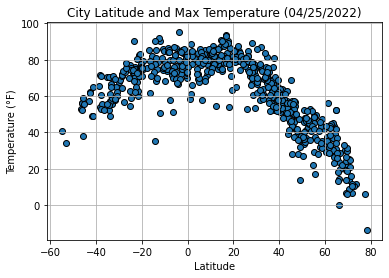

In [13]:
# Latitudes and temperatures
today = pd.to_datetime("today").strftime("%m/%d/%Y")
plt.scatter(clean['Lat'],clean['Max Temp'],marker="o",edgecolor="black")
plt.title(f"City Latitude and Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.grid()
plt.savefig("output_data/lat-temp.png",format="png")

This graph plots the max temperature at each latitude. As latitude approaches zero, the temperature increases across the globe similar to the curvature of the earth.

## Latitude vs. Humidity Plot

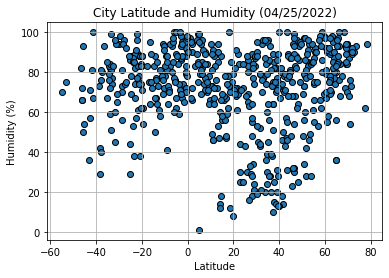

In [20]:
# Latitudes and humidity
plt.scatter(clean['Lat'],clean['Humidity'],marker="o",edgecolor="black")
plt.title(f"City Latitude and Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/lat-humid.png",format="png")

The plot above graphs the humidity as it relates to latitude.

## Latitude vs. Cloudiness Plot

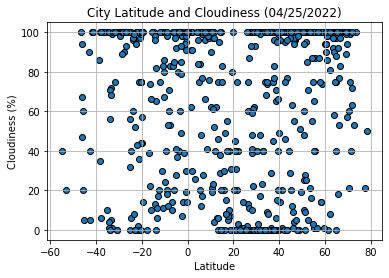

In [21]:
# Latitudes and humidity
plt.scatter(clean['Lat'],clean['Cloudiness'],marker="o",edgecolor="black")
plt.title(f"City Latitude and Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/lat-clouds.png",format="png")

The plot shows cities' cloud levels in relation to latitude.

## Latitude vs. Wind Speed Plot

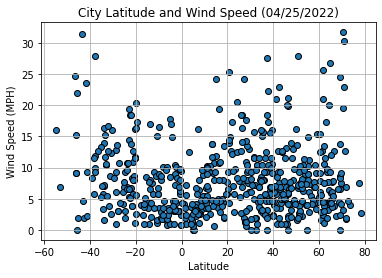

In [22]:
# Latitudes and humidity
plt.scatter(clean['Lat'],clean['Wind Speed'],marker="o",edgecolor="black")
plt.title(f"City Latitude and Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.savefig("output_data/lat-wind.png",format="png")

The wind speed detected in each city as it relates to latitudes.

## Linear Regression

In [17]:
# Break out cities north and south of the equater into north and south DataFrames.
north = clean.loc[clean['Lat'] >= 0]
south = clean.loc[clean['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7854465826817909


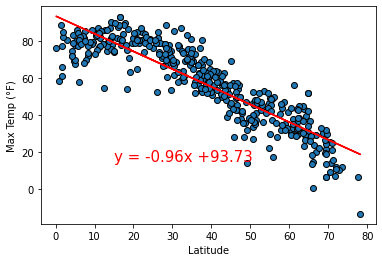

In [23]:
# Northern Hemisphere linear regression latitude/max temp
x_values = north['Lat']
y_values = north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(15,15),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°F)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/north-lat-temp-reg.png",format="png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4575080454084335


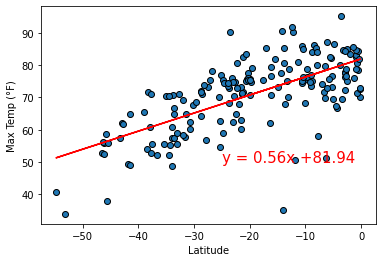

In [24]:
# Southern Hemisphere linear regression latitude/max temp
x_values = south['Lat']
y_values = south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq2,(-25,50),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (°F)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/south-lat-temp-reg.png",format="png")

As latitudes move further away from the equator (0), the max temperature decreases. If this same exercise was performed at a time closer to a solstice, the temperatures might be more extreme

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02177600074355928


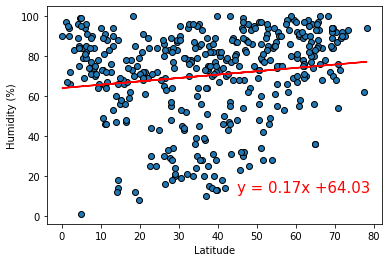

In [25]:
# Northern Hemisphere linear regression latitude/humidity
x_values = north['Lat']
y_values = north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(45,12),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/north-lat-humid-reg.png",format="png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06367611823646001


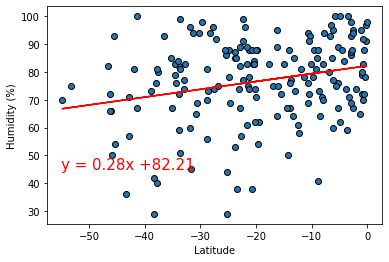

In [35]:
# Southern Hemisphere linear regression latitude/humidity
x_values = south['Lat']
y_values = south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq2,(-55,45),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/south-lat-humid-reg.png",format="png")

There does not seem to be a strong correlation between humidity and latitude, though the northern hemisphere shows a stronger correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03606509846608239


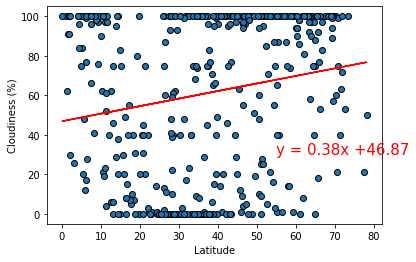

In [36]:
x_values = north['Lat']
y_values = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(55,30),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/north-lat-cloud-reg.png",format="png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.004854605368209174


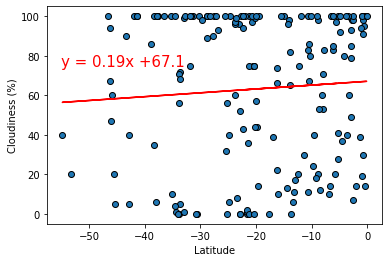

In [37]:
x_values = south['Lat']
y_values = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq2,(-55,75),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/southth-lat-cloud-reg.png",format="png")

The cloud cover is positive for both hemispheres, so across the board the cloud levels increase.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01595275959676599


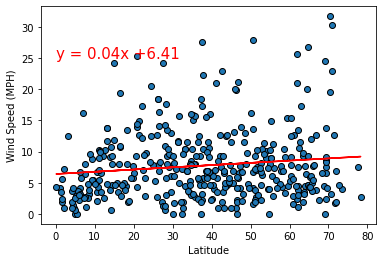

In [38]:
x_values = north['Lat']
y_values = north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,25),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/north-lat-wind-reg.png",format="png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12568482758078722


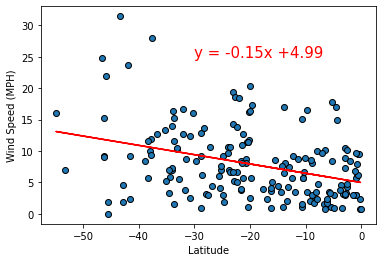

In [39]:
x_values = south['Lat']
y_values = south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq2,(-30,25),fontsize=15,color="red")

plt.scatter(x_values,y_values,edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/south-lat-wind-reg.png",format="png")

According to the graphs, northern hemisphere wind speeds have no real correlation, so winds across the northern hemisphere are much the same. The southern hemisphere has a negative correlation as latitudes increase, so the wind gets weaker as the cities approach the equator.